# Homework 2 : CUAHSI VU : Snow Hydrology

In [1]:
! cp -r /home/jovyan/umpqua .

## B. Setup

As in Homework 1, you will download and install the data sets that you will need to run the exercises. There is no point in downloading the same data over and over again, which is why we will do this once as part of this notebook. Once the data is installed you can move on to the next notebook. All three exercises in Homework 2 will use the same data set for the simulations.

As before, remember that you want to save your notebooks in a place other than the `examples` directory tree, because files you save there may be deleted and overwritten the next time you start your virtual machine. Save your files somewhere in the `work` directory tree: `work/homework_2` would be a great place for them. So click on "_File --> Save Notebook As..._" and save this notebook as `work/homework_2/homework_2_B_setup.ipynb` before you continue. If things go hopelessly wrong, you can always start over again with the original notebook in your `examples` directory tree.

Also, if things go wrong and you overwrite or lose your data you can rerun this setup notebook to re-install the data sets you need for the homework.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysumma as ps

Now let's just make sure it all works. We'll create a simulation object and will run a quick test simulation with the configuration that you now have.

In [3]:
filemanager = './umpqua/settings/snow_fileManager.txt'
executable = 'summa.exe'
s = ps.Simulation(executable, filemanager)

Let's run the test case. This one may take a bit longer than the previous simulations and may take about up to a minute to run. If everything works as it should, then the final line will be `FORTRAN STOP: finished simulation successfully.`.

In [4]:
s.run('local', run_suffix='_homework1_b')

And a quick plot of the snow water equivalent time series to make sure we get output that is meaningful.

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


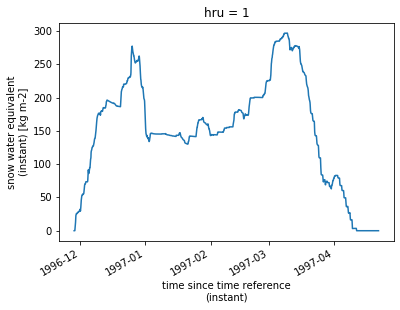

In [5]:
s.output['scalarSWE'].isel(hru=0).plot()

If you inspect the model output, you will notice that there are actually two hrus (hydrologic response units) in the input and output files. The data we are using in this exercise come from observations that Pascal Storck did as part of his PhD at the University of Washington in the mid- to late 1990s. The measurements were made in southern Oregon on the west slope of the Cascade mountains, an area in the transient snow zone that receives a lot of precipitation in winter. One of the goals of the work was to examine the effects of forest harvest practices on snow and hydrology. The first HRU represents a forest clearing, while the second hru represents a forested site.

To plot output for the clearing and the forest, you can do something like:

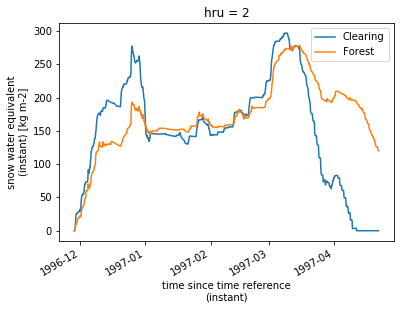

In [6]:
s.output['scalarSWE'].isel(hru=0).plot(label='Clearing')
s.output['scalarSWE'].isel(hru=1).plot(label='Forest')
plt.legend()

Here the forest SWE is actually the snow on the ground (under the trees). Does this look like you'd expect? We'll come back to this in the notebooks that follow.

## On to the next step

You're all set up for the homework assignment and in the net three notebooks it will be your turn to write some python code to manipulate the simulations. Save this notebook and close the tab. You can also right-click on the file in the left panel if it has a green dot next to it and select "_Shutdown kernel_" from the popup menu to stop the python session that is executing the commands in this notebook. Then open the next notebook: `/home/jovyan/examples/homework_1/homework_2_C_exercise_1.ipynb`.